<a href="https://colab.research.google.com/github/RickFaint/varioususefulbatchfiles/blob/main/levenstein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import ipywidgets as widgets
from IPython.display import display

## run this cell by pressing the play button and then select the file from your drive
## file should have two columns the address and the postcode

## this code just creates some boxes to put values in

auto_create_as_new_location1 = widgets.IntText(
    value=40,
    description='new_location:',
    disabled=False
)

matchaddress = widgets.Text(
    disabled=False,
    default = "AMAZON - BOLTON (MAN3) 360 Logistics North"
)

put_in_inbox1 = widgets.IntText(
    value=20,
    description='inbox',
    disabled=False
)
text_description = widgets.HTML(value=" Select a CSV file to upload.")
text_description2 = widgets.HTML(value=" Value must be larger than the inbox value")
text_description3 = widgets.HTML(value=" Value must be smaller than the new location value")
text_description4 = widgets.HTML(value=" enter match location")
upload = widgets.FileUpload(

    accept='.csv',  # Specify the accepted file type (optional)
    multiple=False   # Set to True if you want to allow multiple files to be uploaded
)
display(matchaddress, text_description4)
display(upload, text_description)
display(auto_create_as_new_location1, text_description2)
display(put_in_inbox1, text_description3)

Text(value='')

HTML(value=' enter match location')

FileUpload(value={}, accept='.csv', description='Upload')

HTML(value=' Select a CSV file to upload.')

IntText(value=40, description='new_location:')

HTML(value=' Value must be larger than the inbox value')

IntText(value=20, description='inbox')

HTML(value=' Value must be smaller than the new location value')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 it is AMAZON - BOLTON (MAN3) 360 Logistics North
AMAZONBOLTONMAN3360LogisticsNorth
inbox          34
newlocation     8
automatch       3
Name: category, dtype: int64


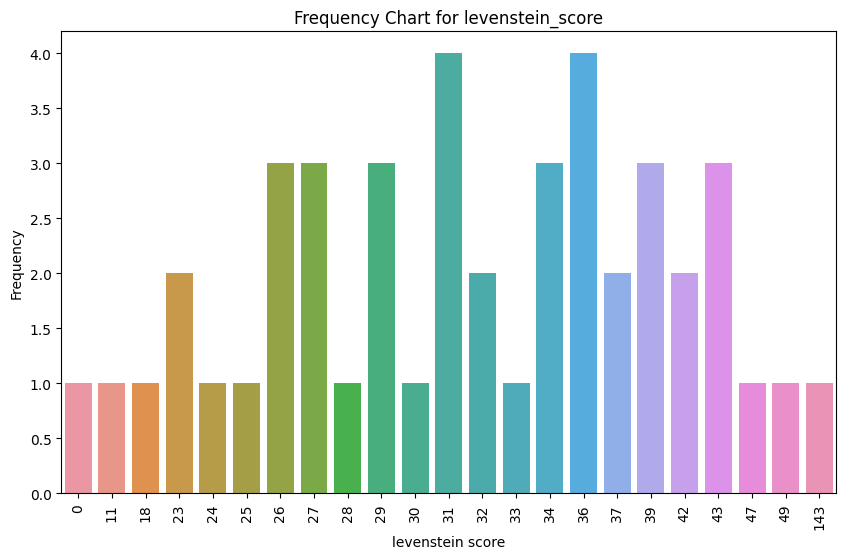

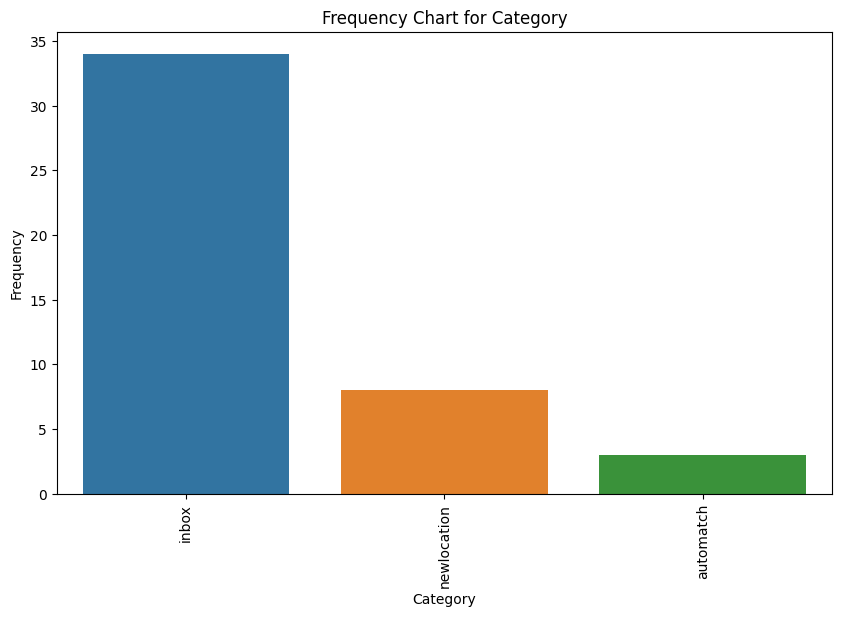

complete


In [94]:

#!pip install pandas
#!pip install python-Levenshtein
#!pip install seaborn
#!pip install matplotlib
import io
from google.colab import drive
import pandas as pd #import panda library
import Levenshtein as pl #import levenstein library
import re #import regex library
import seaborn as sns #import seaborn
import matplotlib.pyplot as plt #import matplotlib

def categorise_score(row):
  #function used to categorise scores
    if row['levenstein_score'] < put_in_inbox_value:
        return "automatch"
    elif put_in_inbox_value <= row['levenstein_score'] < auto_create_as_new_location_value:
        return "inbox"
    else:
        return "newlocation"

drive.mount('/content/drive') # this mounts your google drive however you can just upload from your C drive or other network location

# Convert IntText widget values to integers
put_in_inbox_value = int(put_in_inbox1.value)
auto_create_as_new_location_value = int(auto_create_as_new_location1.value)


matchaddress = str(matchaddress.value) #"AMAZON - BOLTON (MAN3) 360 Logistics North" # comparison address. Replace with the new address
print(" it is " + matchaddress)

cleanMatch = re.sub(r'\W+', '', matchaddress)  # removes all white scace and any non alpha numberic charactors

print(cleanMatch) # prints the clean match address out this is for checking puporses

uploaded_file = list(upload.value.values())[0]



# Get the file content as bytes
file_content = uploaded_file['content']

addressdf = pd.read_csv(io.BytesIO(file_content)) # upload file as a raw string. files are uploaded into a panda.
# You will need to upload your file via the file menu on colab. Files are deleted at end of the session
# File is the address in a single cell and then the postcode. Postcode is not used . Included in case I want to use it later

addressdf.columns = ['address', 'postcode'] #rename columns so that it won't error if columns named differently

addressdf['cleaned_address'] = addressdf['address'].str.replace(r'\W+', '', regex=True) #adds a new column. New column is address with white space and non alpha removed

addressdf['levenstein_score'] = addressdf['cleaned_address'].apply(lambda x: pl.distance(x, cleanMatch)) #calculates the lev distance

#gives a classification of the lev distance by calling categorise score function
addressdf['category'] = addressdf.apply(categorise_score, axis=1)


#gets a count of those classifcation then prints them
cat_counts = addressdf['category'].str.split().explode().value_counts()
print(cat_counts)

#calculates the frequency of each levenstien score
column_freq = addressdf['levenstein_score'].value_counts()

# Plot the frequency chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=column_freq.index, y=column_freq.values)
plt.xlabel('levenstein score')
plt.ylabel('Frequency')
plt.title('Frequency Chart for levenstein_score')
plt.xticks(rotation=90)
plt.show()

column_freq_cat = addressdf['category'].value_counts()

# Plot the frequency chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=column_freq_cat.index, y=column_freq_cat.values)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency Chart for Category')
plt.xticks(rotation=90)
plt.show()

addressdf.to_csv(r"/content/addressresults.csv", index=False) #exports the results so you can look at them

print("complete") # so you can tell its finished. You need to f5 to see file

# New section